In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load Seaborn 'tips' dataset
data = sns.load_dataset('tips')

# Introduce some missing values for demonstration (optional)
data.loc[0:5, 'total_bill'] = np.nan


In [9]:
# 1. Preprocess the Dataset
# Check and handle missing data (if any)
print("Missing values before preprocessing:")
print(data.isnull().sum())


Missing values before preprocessing:
total_bill    6
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [10]:

# 2. Detect and Remove Outliers (Using Z-score Method)
numerical_columns = ['total_bill', 'tip', 'size']
z_scores = np.abs(zscore(data[numerical_columns]))  # Calculate Z-scores

# Set a threshold for Z-score to detect outliers
threshold = 3
z_outliers = (z_scores > threshold)

# Remove rows where any of the Z-scores are above the threshold
data_cleaned = data[~np.any(z_outliers, axis=1)]

In [11]:
# 3. Calculate Percentile, Mean, and Standard Deviation
# Calculate the percentile (25th, 50th, and 75th)
percentiles = data_cleaned[numerical_columns].quantile([0.25, 0.5, 0.75])
print("\nPercentiles (25th, 50th, 75th) of numerical columns:")
print(percentiles)

# Calculate the mean and standard deviation
mean_values = data_cleaned[numerical_columns].mean()
std_values = data_cleaned[numerical_columns].std()
print("\nMean values:")
print(mean_values)
print("\nStandard Deviation values:")
print(std_values)


Percentiles (25th, 50th, 75th) of numerical columns:
      total_bill   tip  size
0.25      13.215  2.00   2.0
0.50      17.460  2.75   2.0
0.75      23.135  3.50   3.0

Mean values:
total_bill    19.168788
tip            2.886498
size           2.497890
dtype: float64

Standard Deviation values:
total_bill    8.254456
tip           1.187958
size          0.841833
dtype: float64


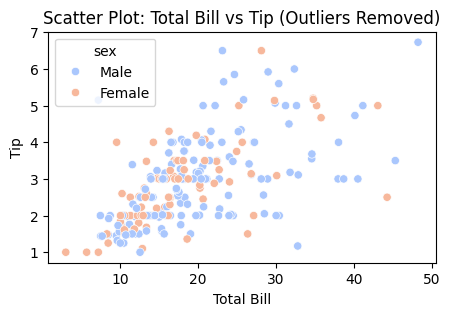

In [13]:

# 4. Data Visualization using Seaborn

# a) Scatter Plot: Relationship between 'total_bill' and 'tip'
plt.figure(figsize=(5, 3))
sns.scatterplot(data=data_cleaned, x='total_bill', y='tip', hue='sex', palette='coolwarm')
plt.title('Scatter Plot: Total Bill vs Tip (Outliers Removed)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


/tmp/ipykernel_41568/2696435637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='day', y='total_bill', palette='Set2')


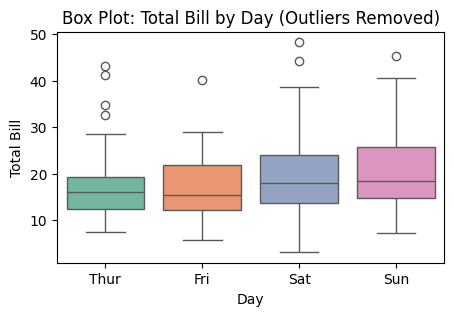

In [15]:
# b) Box Plot: Distribution of 'total_bill' across days
plt.figure(figsize=(5, 3))
sns.boxplot(data=data_cleaned, x='day', y='total_bill', palette='Set2')
plt.title('Box Plot: Total Bill by Day (Outliers Removed)')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

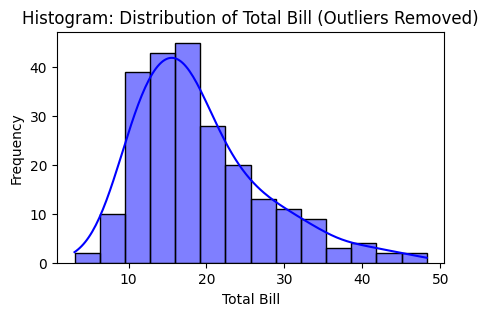

In [16]:
# c) Histogram: Distribution of 'total_bill'
plt.figure(figsize=(5, 3))
sns.histplot(data_cleaned['total_bill'], kde=True, color='blue')
plt.title('Histogram: Distribution of Total Bill (Outliers Removed)')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

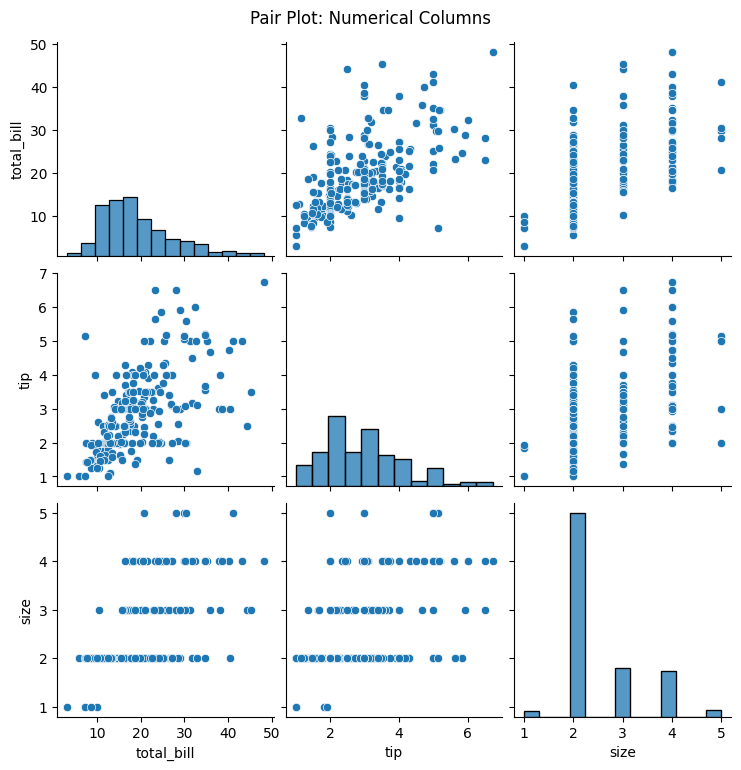

In [17]:
# d) Pair Plot: Pairwise relationships of numerical columns
sns.pairplot(data_cleaned[numerical_columns])
plt.suptitle('Pair Plot: Numerical Columns', y=1.02)
plt.show()